In [1]:
cd C:\Users\xupu\Desktop\个人征信

C:\Users\xupu\Desktop\个人征信


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
user_info_train = pd.read_csv('train//user_info_train.txt',header=None,names=['user_id','sex','occupation','education','marriage','household'])
user_info_test = pd.read_csv('test//user_info_test.txt',header=None,names=['user_id','sex','occupation','education','marriage','household'])

In [4]:
bank_detail_train = pd.read_csv('train//bank_detail_train.txt',header=None,names=['user_id','tm_encode','trade_type','trade_amount','salary_tag'])
bank_detail_test = pd.read_csv('test//bank_detail_test.txt',header=None,names=['user_id','tm_encode','trade_type','trade_amount','salary_tag'])

In [5]:
bank_detail_train.head()

,user_id,tm_encode,trade_type,trade_amount,salary_tag
0,6965,5894316387,0,13.756664,0
1,6965,5894321388,1,13.756664,0
2,6965,5897553564,0,14.449810,0
3,6965,5897563463,1,10.527763,0
4,6965,5897564598,1,13.651303,0


In [6]:
#计算个人总收入，总支出，平均收入，平均支出
grouped0_train = bank_detail_train.groupby(['user_id','trade_type'])
grouped0_test = bank_detail_test.groupby(['user_id','trade_type'])

In [7]:
income_train_mean = grouped0_train['trade_amount'].mean().unstack()
income_test_mean = grouped0_test['trade_amount'].mean().unstack()

In [8]:
income_train_sum = grouped0_train['trade_amount'].sum().unstack()
income_test_sum = grouped0_test['trade_amount'].sum().unstack()

In [9]:
income_train_mean.rename(columns={0:'mean_income',1:'mean_pay'},inplace = True)
income_test_mean.rename(columns={0:'mean_income',1:'mean_pay'},inplace = True)

In [10]:
income_train_sum.rename(columns={0:'sum_income',1:'sum_pay'},inplace = True)
income_test_sum.rename(columns={0:'sum_income',1:'sum_pay'},inplace = True)

In [11]:
incomes_train = pd.concat([income_train_mean,income_train_sum],axis=1)
incomes_test = pd.concat([income_test_mean,income_test_sum],axis=1)

In [12]:
# 计算个人平均工资收入
tag1_train = bank_detail_train.loc[bank_detail_train['salary_tag']==1]
tag1_test = bank_detail_test.loc[bank_detail_test['salary_tag']==1]

In [13]:
salary_train = tag1_train.groupby('user_id')['trade_amount'].mean()
salary_test = tag1_test.groupby('user_id')['trade_amount'].mean()

In [14]:
bank_train = pd.concat([incomes_train,salary_train],axis=1)
bank_test = pd.concat([incomes_test,salary_test],axis=1)

In [15]:
new_bank_train = bank_train.reset_index()
new_bank_test = bank_test.reset_index()#合并到总表

In [18]:
bill_detail_train = pd.read_csv('train//bill_detail_train.txt',header=None,names=['user_id','tm_encode','bank_id','last_bill','last_return','credit_amount','this_bill_left','minreturn_bill','use_times','this_bill_amount','adjust_amount','recircle_rate','left_amount','load_amount','return_item'])

In [19]:
bill_detail_test = pd.read_csv('test//bill_detail_test.txt',header=None,names=['user_id','tm_encode','bank_id','last_bill','last_return','credit_amount','this_bill_left','minreturn_bill','use_times','this_bill_amount','adjust_amount','recircle_rate','left_amount','load_amount','return_item'])

In [21]:
# 平均信用卡账单金额
mean_bill_train = bill_detail_train.loc[:,['user_id','this_bill_amount']]
mean_bill_test = bill_detail_test.loc[:,['user_id','this_bill_amount']]

In [22]:
mean_bill_train = mean_bill_train.loc[mean_bill_train['this_bill_amount']!=0]
mean_bill_test = mean_bill_test.loc[mean_bill_test['this_bill_amount']!=0]

In [23]:
mean_bill_train = mean_bill_train.groupby('user_id')['this_bill_amount'].mean()
mean_bill_test = mean_bill_test.groupby('user_id')['this_bill_amount'].mean()

In [24]:
# 合并到表
mean_bill_train = pd.DataFrame(mean_bill_train).reset_index()
mean_bill_test = pd.DataFrame(mean_bill_test).reset_index()

In [26]:
bill_detail_train = bill_detail_train.drop(['tm_encode','last_bill','last_return','minreturn_bill','use_times','adjust_amount'],axis=1)
bill_detail_test = bill_detail_test.drop(['tm_encode','last_bill','last_return','minreturn_bill','use_times','adjust_amount'],axis=1)

In [27]:
#持有信用卡数量
banks_train = bill_detail_train[['user_id','bank_id']]
banks_test = bill_detail_test[['user_id','bank_id']]

In [28]:
banks1_train = banks_train.drop_duplicates()
banks1_test = banks_test.drop_duplicates()

In [29]:
banks2_train = banks1_train.groupby('user_id')
banks2_test = banks1_test.groupby('user_id')

In [30]:
banks3_train = banks2_train.count()
banks3_test = banks2_test.count()

In [31]:
banks4_train = banks3_train.reset_index()
banks4_test = banks3_test.reset_index()

In [32]:
banks5_train = banks4_train.rename(columns={'bank_id':'banks'})
banks5_test = banks4_test.rename(columns={'bank_id':'banks'})
#合并到表

In [33]:
grouped1_train = bill_detail_train.groupby(['user_id','bank_id'])
grouped1_test = bill_detail_test.groupby(['user_id','bank_id'])

In [34]:
#平均信用卡额度
credit_amount_train = (grouped1_train['credit_amount'].sum())/(grouped1_train['credit_amount'].size())
credit_amount_test = (grouped1_test['credit_amount'].sum())/(grouped1_test['credit_amount'].size())

In [35]:
credit_amount_train.head()

user_id  bank_id
2        4          19.573962
         9          19.971271
         16         17.264566
3        2          18.361833
4        3          20.441274
dtype: float64

In [36]:
credit_amounts_train = pd.DataFrame(credit_amount_train).reset_index()
credit_amounts_test = pd.DataFrame(credit_amount_test).reset_index()

In [37]:
credit_amounts_train.rename(columns={0:'credits'},inplace=True)
credit_amounts_test.rename(columns={0:'credits'},inplace=True)

In [42]:
user_credit_amount_train = pd.DataFrame((credit_amounts_train.groupby('user_id')['credits'].sum())/(credit_amounts_train.groupby('user_id')['bank_id'].count()))
user_credit_amount_test = pd.DataFrame((credit_amounts_test.groupby('user_id')['credits'].sum())/(credit_amounts_test.groupby('user_id')['bank_id'].count()))

In [43]:
user_credit_amount_train = user_credit_amount_train.reset_index()
user_credit_amount_test = user_credit_amount_test.reset_index()

In [45]:
user_credit_amount_train.rename(columns={0:'credits'},inplace=True)
user_credit_amount_test.rename(columns={0:'credits'},inplace=True)
#合并到表

In [47]:
grouped2_train = bill_detail_train.groupby('user_id')
grouped2_test = bill_detail_test.groupby('user_id')

In [48]:
#用户信用卡发生的总利息
user_rate_train = grouped2_train['recircle_rate'].sum().reset_index()
user_rate_test = grouped2_test['recircle_rate'].sum().reset_index()

In [50]:
d_train = pd.merge(banks5_train,user_credit_amount_train,on='user_id')
d_test = pd.merge(banks5_test,user_credit_amount_test,on='user_id')

In [51]:
e_train = pd.merge(d_train,user_rate_train,on='user_id')
e_test = pd.merge(d_test,user_rate_test,on='user_id')

In [52]:
f_train = pd.merge(e_train,mean_bill_train,on='user_id') 
f_test = pd.merge(e_test,mean_bill_test,on='user_id') 
#合并到总表

In [53]:
overdue_train = pd.read_csv('train//overdue_train.txt',header=None,names=['user_id','target'])

In [54]:
browse_history_train = pd.read_csv('train//browse_history_train.txt',header=None,names=['user_id','tm_encode_2','browse_data','browse_tag'])

In [55]:
browse_history_test = pd.read_csv('test//browse_history_test.txt',header=None,names=['user_id','tm_encode_2','browse_data','browse_tag'])

In [56]:
#用户总浏览频次
browse_times_train = browse_history_train[['user_id','tm_encode_2']]

In [57]:
browse_times_test = browse_history_test[['user_id','tm_encode_2']]

In [58]:
browse_train = browse_times_train.drop_duplicates()
browse_test = browse_times_test.drop_duplicates()

In [59]:
browse1_train = browse_train.groupby('user_id')
browse1_test = browse_test.groupby('user_id')

In [60]:
browse2_train = browse1_train['tm_encode_2'].count()
browse2_test = browse1_test['tm_encode_2'].count()

In [61]:
browse3_train = pd.DataFrame(browse2_train).reset_index()
browse3_test = pd.DataFrame(browse2_test).reset_index()

In [62]:
df_train = pd.merge(user_info_train,overdue_train,on='user_id')

In [63]:
df1_train = pd.merge(df_train,f_train,on='user_id',how='left')
df1_test = pd.merge(user_info_test,f_test,on='user_id',how='left')

In [64]:
df2_train = pd.merge(df1_train,new_bank_train,on='user_id',how='left')
df2_test = pd.merge(df1_test,new_bank_test,on='user_id',how='left')

In [65]:
df2_train.shape

(55596, 16)

In [112]:
df3_train = pd.merge(df2_train,browse3_train,on='user_id',how='left')
df3_test = pd.merge(df2_test,browse3_test,on='user_id',how='left')

In [67]:
df3_train['sex'].replace(0,method='pad',inplace=True)
df3_test['sex'].replace(0,method='pad',inplace=True)

In [116]:
df3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55596 entries, 0 to 55595
Data columns (total 17 columns):
user_id             55596 non-null int64
sex                 55596 non-null int64
occupation          55596 non-null int64
education           55596 non-null int64
marriage            55596 non-null int64
household           55596 non-null int64
target              55596 non-null int64
banks               45375 non-null float64
credits             45375 non-null float64
recircle_rate       45375 non-null float64
this_bill_amount    45375 non-null float64
mean_income         9293 non-null float64
mean_pay            9284 non-null float64
sum_income          9293 non-null float64
sum_pay             9284 non-null float64
trade_amount        2991 non-null float64
tm_encode_2         47330 non-null float64
dtypes: float64(10), int64(7)
memory usage: 7.6 MB


In [113]:
df3_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13899 entries, 0 to 13898
Data columns (total 16 columns):
user_id             13899 non-null int64
sex                 13899 non-null int64
occupation          13899 non-null int64
education           13899 non-null int64
marriage            13899 non-null int64
household           13899 non-null int64
banks               10960 non-null float64
credits             10960 non-null float64
recircle_rate       10960 non-null float64
this_bill_amount    10960 non-null float64
mean_income         709 non-null float64
mean_pay            705 non-null float64
sum_income          709 non-null float64
sum_pay             705 non-null float64
trade_amount        166 non-null float64
tm_encode_2         11997 non-null float64
dtypes: float64(10), int64(6)
memory usage: 1.8 MB


In [117]:
df3_train.fillna(-999,inplace=True)

In [118]:
df3_test.fillna(-999,inplace=True)

In [119]:
df3_train = pd.get_dummies(data=df3_train,columns=['sex','occupation','education','marriage','household'])

In [120]:
df3_test = pd.get_dummies(data=df3_test,columns=['sex','occupation','education','marriage','household'])

In [121]:
X = df3_train.drop(['user_id','target'],axis=1)
Y = df3_train['target']

In [122]:
X_test = df3_test.drop(['user_id'],axis=1)

In [124]:
X.head()

,banks,credits,recircle_rate,this_bill_amount,mean_income,mean_pay,sum_income,sum_pay,trade_amount,tm_encode_2,...,marriage_1,marriage_2,marriage_3,marriage_4,marriage_5,household_0,household_1,household_2,household_3,household_4
0,5.0,16.512730,0.000000,19.680223,-999.000000,-999.000000,-999.000000,-999.000000,-999.0,-999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,19.971271,62.082722,18.825107,12.971336,11.192152,972.850228,3234.531975,-999.0,34.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,19.979821,279.476096,19.007284,13.665650,12.457337,1708.206195,3662.457063,-999.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,8.0,16.178042,1161.246092,18.631734,-999.000000,-999.000000,-999.000000,-999.000000,-999.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,19.020621,155.478508,18.762691,12.847302,11.430923,2736.475318,7064.310678,-999.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [125]:
X_test.head()

,banks,credits,recircle_rate,this_bill_amount,mean_income,mean_pay,sum_income,sum_pay,trade_amount,tm_encode_2,...,marriage_1,marriage_2,marriage_3,marriage_4,marriage_5,household_0,household_1,household_2,household_3,household_4
0,4.0,18.906635,0.000000,18.316042,14.615321,12.253343,1593.070037,4521.483589,-999.000000,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.0,20.166904,47.949803,18.367104,13.207106,11.423941,2033.894275,5300.708664,15.105702,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,7.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-999.0,-999.000000,-999.000000,-999.000000,12.843720,11.978474,5445.737430,6959.493585,-999.000000,18.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [126]:
from sklearn.cross_validation import train_test_split

In [127]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.7)

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

In [276]:
gbc = GradientBoostingClassifier(max_depth=4)

In [277]:
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [278]:
gbc.score(xtest,ytest)

0.8721745908028059

In [279]:
gbc.predict_proba(xtest)

array([[ 0.888107  ,  0.111893  ],
       [ 0.92905016,  0.07094984],
       [ 0.88652902,  0.11347098],
       ..., 
       [ 0.8862274 ,  0.1137726 ],
       [ 0.80371281,  0.19628719],
       [ 0.874085  ,  0.125915  ]])

In [280]:
from sklearn.metrics import precision_recall_curve

In [281]:
ytrue = ytest

In [282]:
pred =gbc.predict_proba(xtest)[:,1]

In [283]:
pre,recall,thre = precision_recall_curve(ytrue,pred)

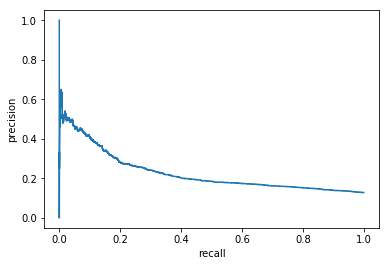

In [284]:
plt.plot(recall,pre)
plt.xlabel('recall')
plt.ylabel('precision')

In [285]:
from sklearn.metrics import roc_auc_score

In [286]:
roc_auc_score(ytrue,pred)

0.63272838896198569

In [140]:
gbc.feature_importances_

array([ 0.0398149 ,  0.09963522,  0.114046  ,  0.12711602,  0.10629873,
        0.03987913,  0.04993321,  0.05557625,  0.04409173,  0.07373397,
        0.08632434,  0.00591513,  0.02172178,  0.00053637,  0.00402582,
        0.00370534,  0.00164421,  0.01945467,  0.00070514,  0.00561397,
        0.01816729,  0.0007975 ,  0.01161019,  0.0018555 ,  0.0140744 ,
        0.0003196 ,  0.00403789,  0.00642633,  0.00864224,  0.00078668,
        0.00168784,  0.01380724,  0.00068977,  0.01732558])

In [141]:
predict = gbc.predict_proba(X_test)[:,1]

In [142]:
predict = pd.Series(predict)

In [143]:
result = pd.concat([df3_test['user_id'],predict],axis=1)

In [144]:
result = result.rename(columns={'user_id':'userid',0:'probability'})

In [145]:
result.to_csv('C:\\Users\\xupu\\Desktop\\xupu17.csv',index=False)